In [72]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import itertools
from scipy.stats import cumfreq
from scipy.special import comb
import math

# Angular Similarity

In [73]:
# read in R.txt
R = np.loadtxt('R.txt', delimiter=' ', dtype='float')
n, d = R.shape

In [74]:
def angular_sim(a, b, normed=False):
    if not normed:
        if not math.isclose(np.linalg.norm(a), 1.0):
            a /= np.linalg.norm(a)
        if not math.isclose(np.linalg.norm(b), 1.0):
            b /= np.linalg.norm(b)
        
    return 1 - (1/math.pi)*math.acos(np.dot(a,b))
        

In [75]:
similarities = []
com = comb(n,2)
for combo in itertools.combinations(R, 2):
    similarities.append(angular_sim(combo[0], combo[1]))
    
similarities = np.array(similarities)
assert similarities.shape[0] == com

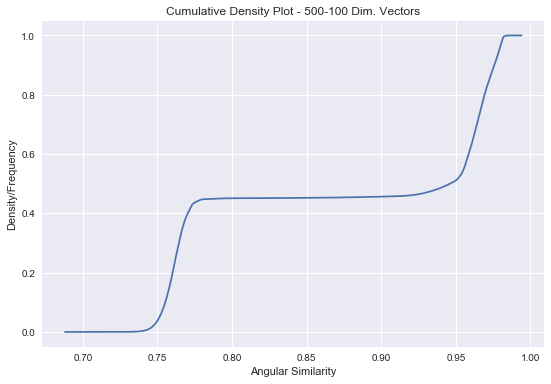

In [76]:
plt.figure(figsize=(9,6))
plt.plot(np.sort(similarities), cumfreq(np.sort(similarities), numbins=len(similarities))[0]/len(similarities))
plt.title('Cumulative Density Plot - 500-100 Dim. Vectors')
plt.xlabel('Angular Similarity')
plt.ylabel('Density/Frequency')
plt.margins(0.05)
plt.savefig('RAngularCDF.png')

In [77]:
tau_bound =similarities[similarities > .85].shape[0]

In [78]:
tau_bound/com

0.5394709418837675

In [79]:
def rand_unit_vecs(t, d):
    vecs = []
    for _ in range(t):
        x = np.random.normal(size=d)
        x /= np.linalg.norm(x)
        vecs.append(x)
        
    return np.array(vecs)
        

In [80]:
np.random.seed(664557)

sims = []
com = comb(160,2)

for combo in itertools.combinations(rand_unit_vecs(160, 100), 2):
    sims.append(angular_sim(combo[0], combo[1], normed=True))
    
sims = np.array(sims)
assert sims.shape[0] == com

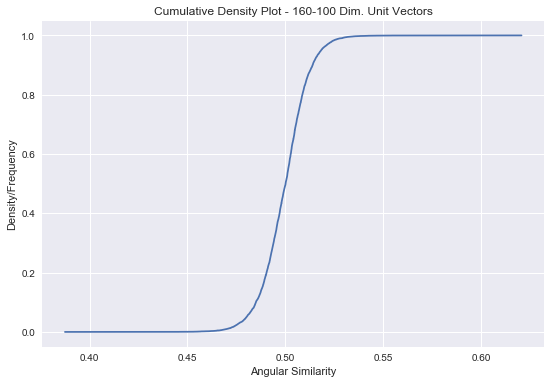

In [81]:
plt.figure(figsize=(9,6))
plt.plot(np.sort(sims), cumfreq(np.sort(sims), numbins=len(sims))[0]/len(sims))
plt.title('Cumulative Density Plot - 160-100 Dim. Unit Vectors')
plt.xlabel('Angular Similarity')
plt.ylabel('Density/Frequency')
plt.margins(0.05)
plt.savefig('UnitAngularCDF.png')

In [82]:
tau_bound =sims[sims > .85].shape[0]
tau_bound/com

0.0